### California housing dataset

In [1]:
# Import the required function
from sklearn.datasets import fetch_california_housing

# Fetch the dataset
california_data = fetch_california_housing(as_frame=True)

# Access the data and target as a pandas DataFrame
california_df = california_data.frame

# Display the first few rows of the dataset
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print(california_data.data.shape, california_data.target.shape)
print(california_data.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
import matplotlib.pyplot as plt

In [19]:
data = california_data.data
target = california_data.target

### Data visualizing

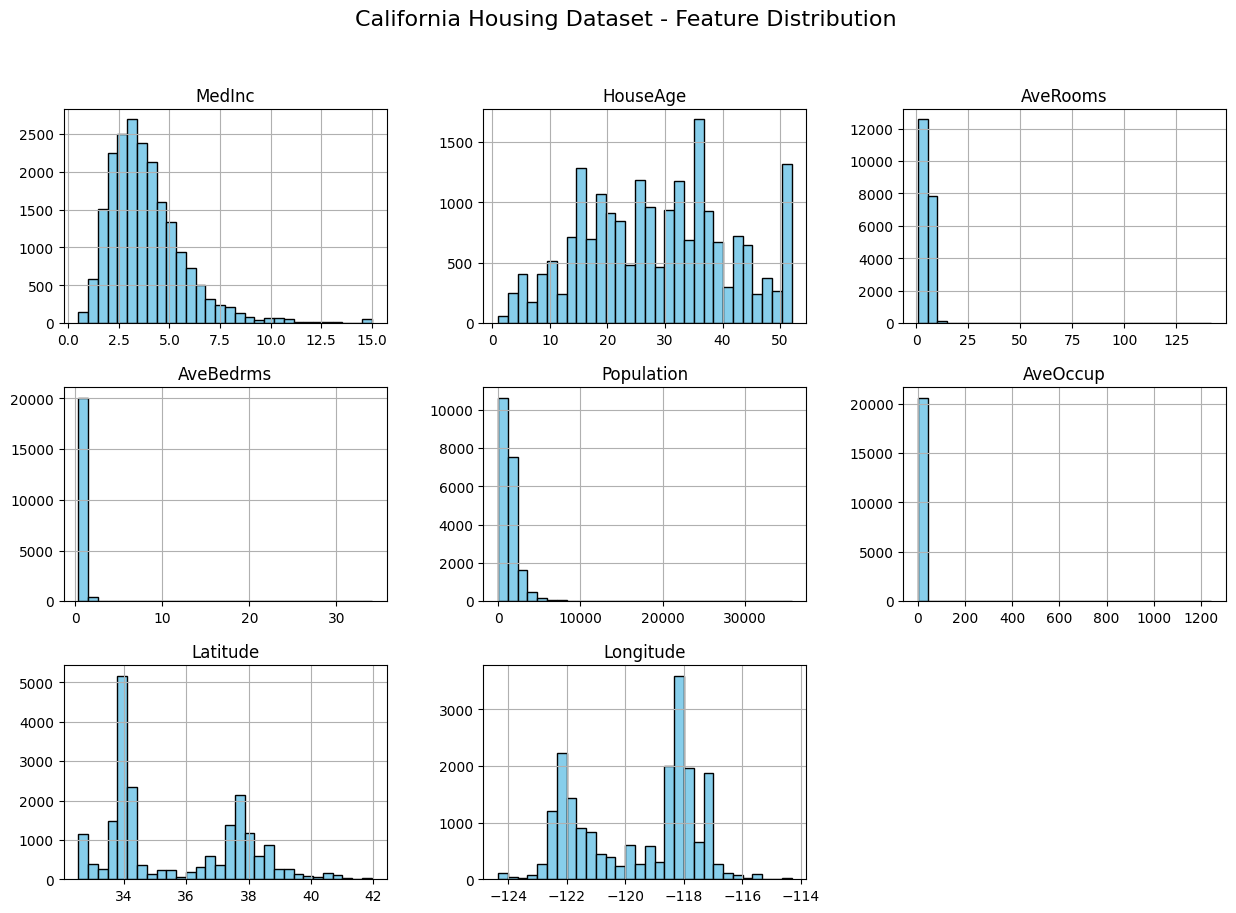

In [26]:
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("California Housing Dataset - Feature Distribution", fontsize=16)
plt.show()

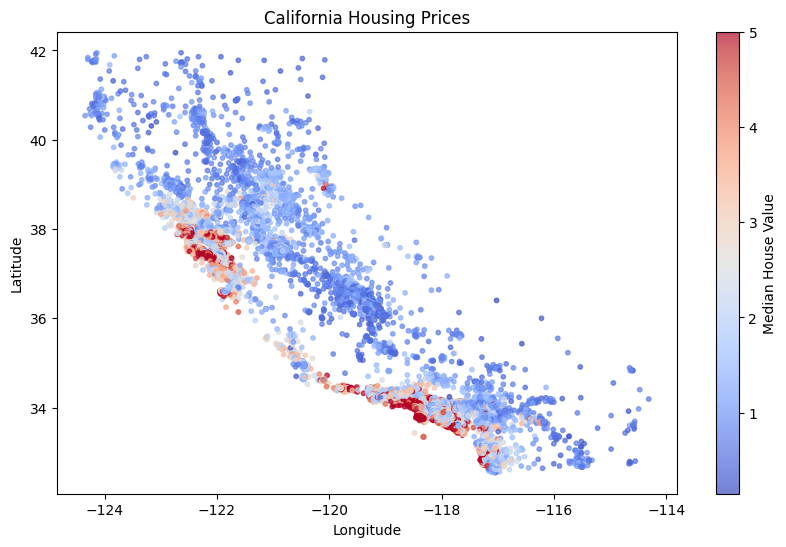

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=target, cmap='coolwarm', s=10, alpha=0.7)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.show()

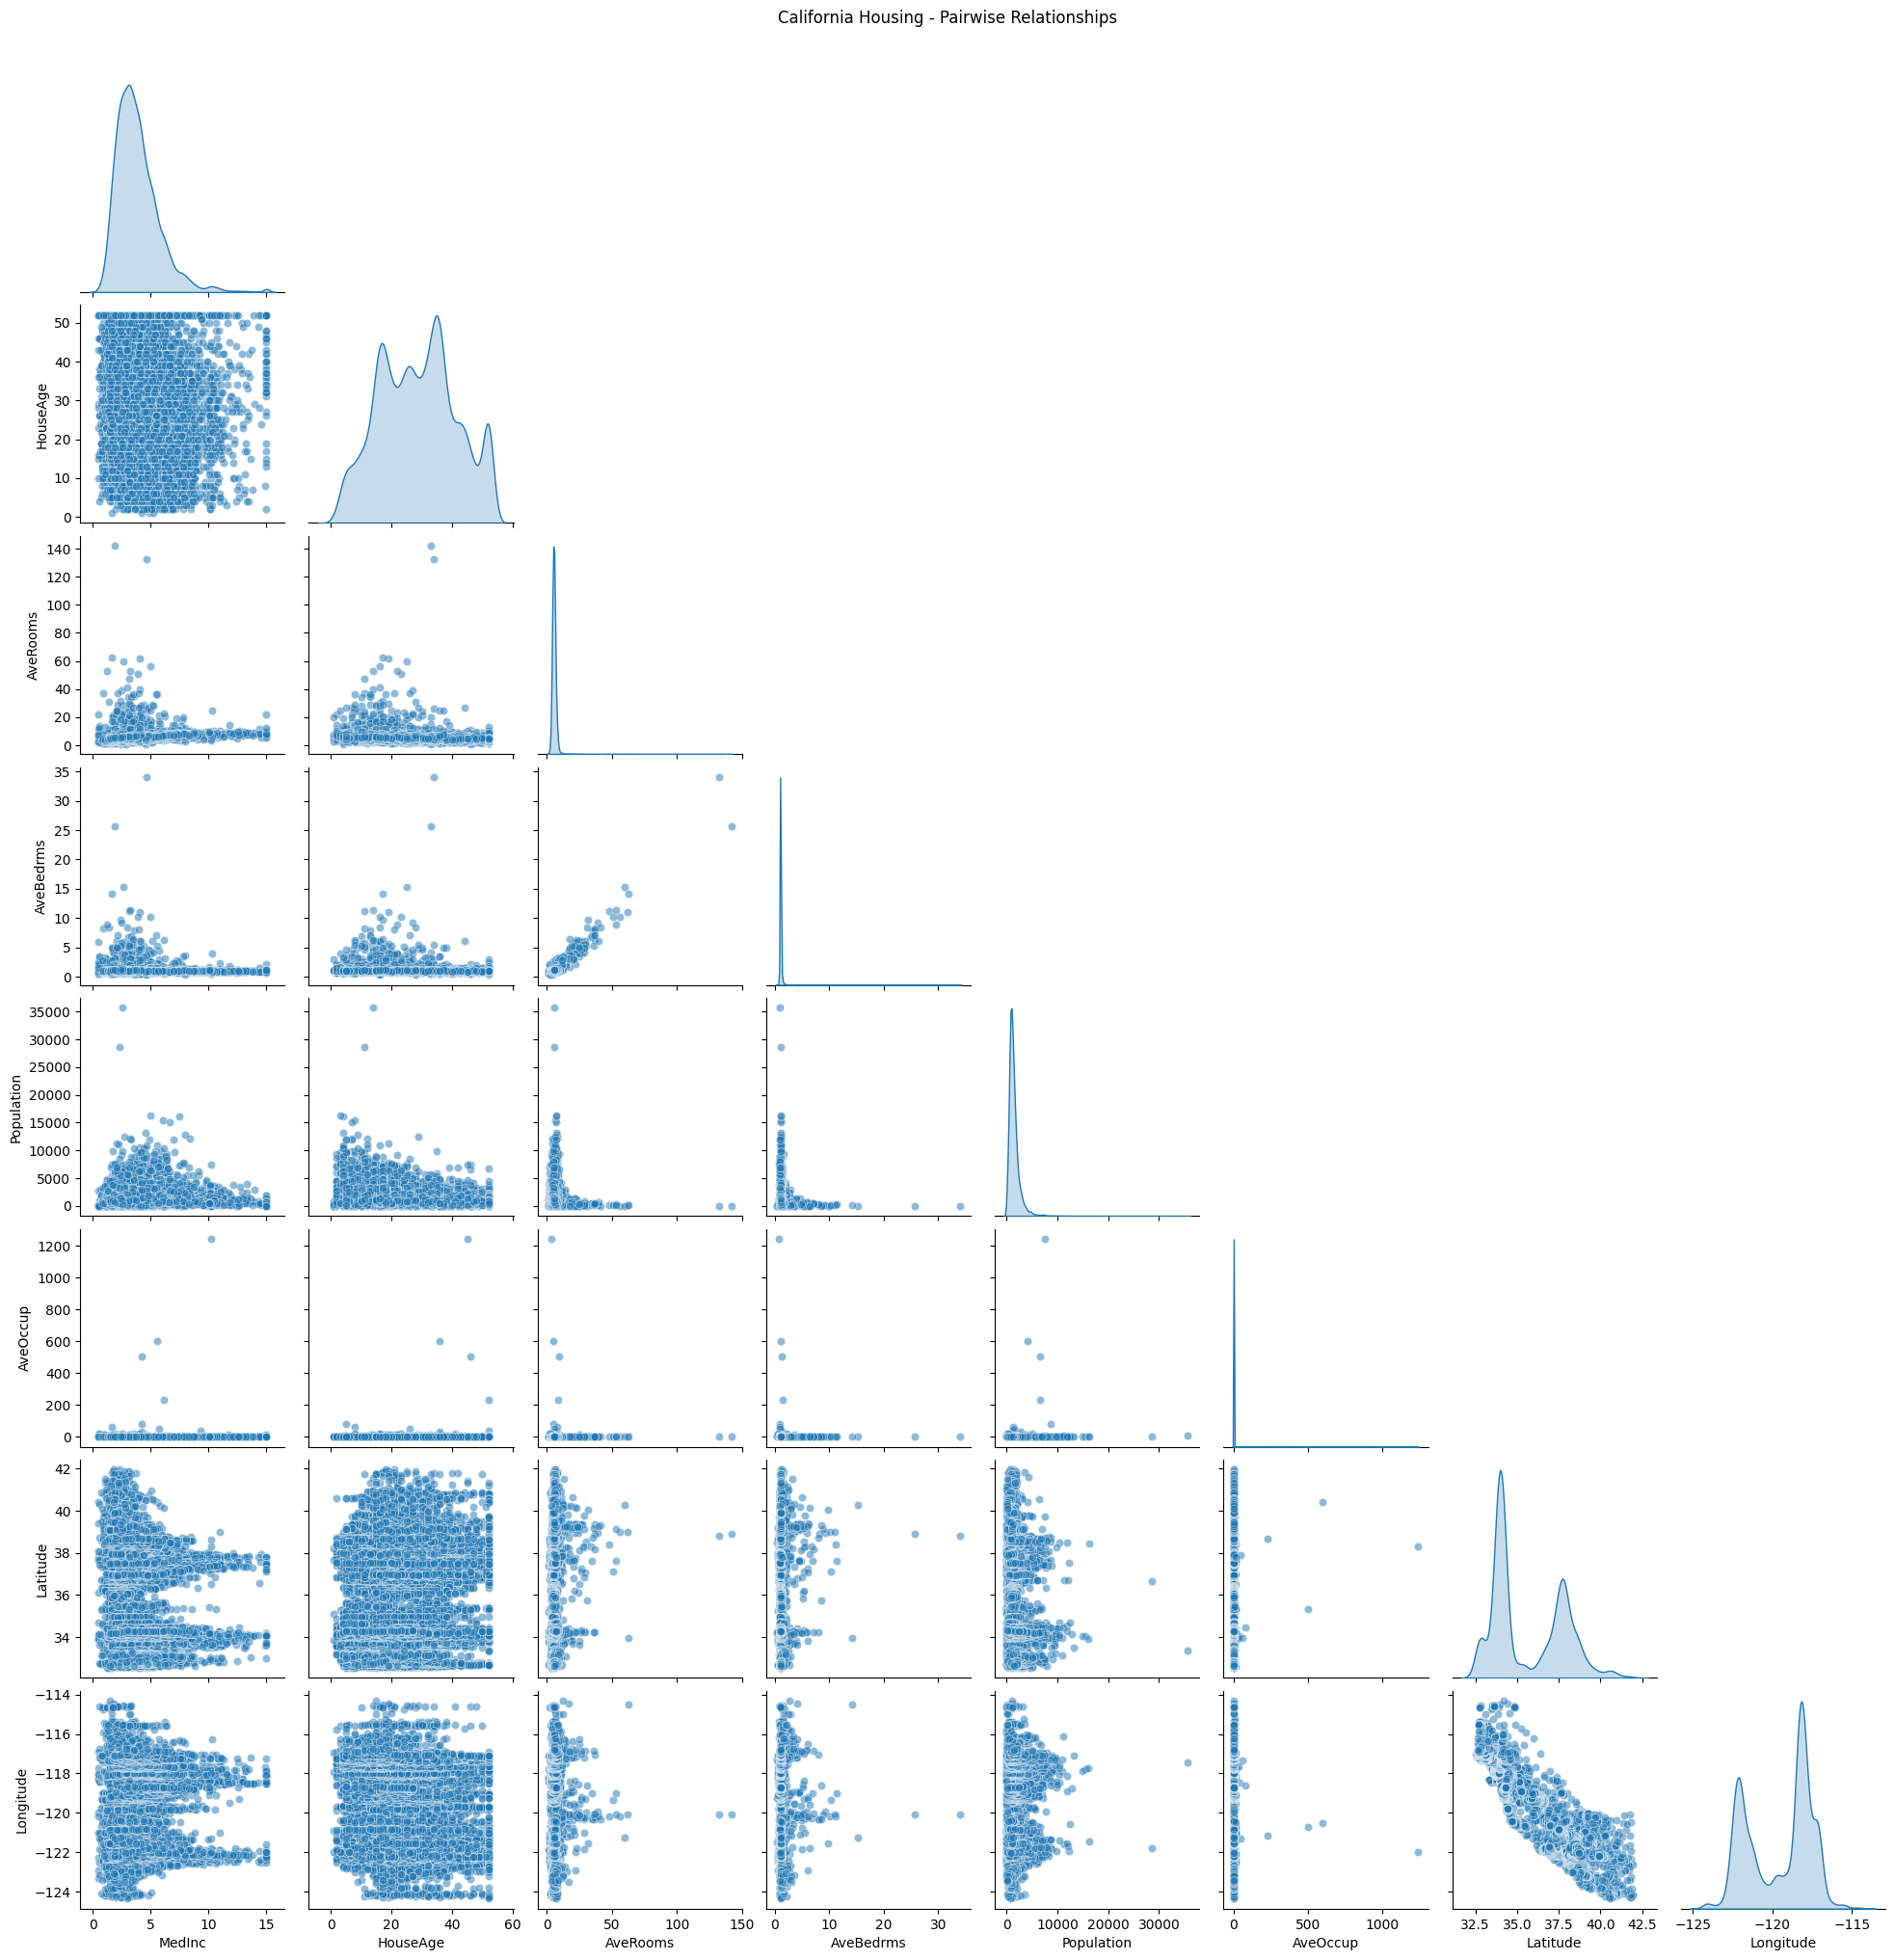

In [29]:
import seaborn as sns

sns.pairplot(data, corner=True, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("California Housing - Pairwise Relationships", y=1.02)
plt.show()

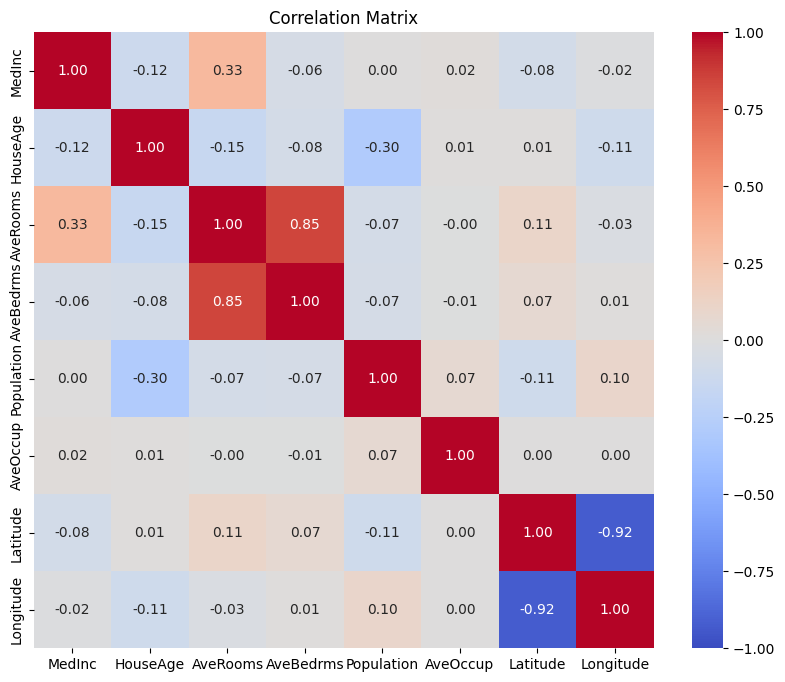

In [34]:
import numpy as np

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [17]:
#check for missing values
california_data.data.isnull().values.any()

np.False_